In [77]:
import pandas as pd

In [78]:
df = pd.read_csv("/content/African_crises_dataset - African_crises_dataset.csv")

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [80]:
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [81]:
df.duplicated().sum()

0

In [82]:
df.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [83]:
import numpy as np

In [84]:
# Remove 'country_number' as it's redundant

df.drop(columns=['country_number'], inplace=True)

In [85]:
# Encode 'banking_crisis' as binary (1 = crisis, 0 = no_crisis)

df['banking_crisis'] = df['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})

In [86]:
# Handle outliers using IQR method (cap extreme values)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

In [87]:
# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [88]:
# Cap outliers
df[numeric_cols] = np.where(df[numeric_cols] < lower_bound, lower_bound, df[numeric_cols])
df[numeric_cols] = np.where(df[numeric_cols] > upper_bound, upper_bound, df[numeric_cols])


In [89]:
# Verify changes
df.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059.0,1059.000000,1059.0,1059.0,1059.0,1059.000000,1059.0,1059.0,1059.0,1059.0
mean,1968.246459,0.0,6.056483,0.0,0.0,0.0,7.596038,1.0,0.0,0.0,0.0
std,32.224874,0.0,8.107415,0.0,0.0,0.0,8.773476,0.0,0.0,0.0,0.0
min,1886.500000,0.0,0.000000,0.0,0.0,0.0,-12.250666,1.0,0.0,0.0,0.0
25%,1951.000000,0.0,0.195350,0.0,0.0,0.0,2.086162,1.0,0.0,0.0,0.0
50%,1973.000000,0.0,0.868400,0.0,0.0,0.0,5.762330,1.0,0.0,0.0,0.0
75%,1994.000000,0.0,8.462750,0.0,0.0,0.0,11.644048,1.0,0.0,0.0,0.0
max,2014.000000,0.0,20.863850,0.0,0.0,0.0,25.980876,1.0,0.0,0.0,0.0


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [91]:
# Drop identifier columns and target from features
features = df.drop(columns=['systemic_crisis', 'country', 'country_code'])

In [92]:
# Target variable
target = df['systemic_crisis']

In [93]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [94]:
# Verify split sizes
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

((847, 10),
 (212, 10),
 systemic_crisis
 0.0    1.0
 Name: proportion, dtype: float64,
 systemic_crisis
 0.0    1.0
 Name: proportion, dtype: float64)

In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
print(y_train.value_counts())


systemic_crisis
0.0    847
Name: count, dtype: int64


In [97]:
# Check class distribution in y_train and y_test
y_train.value_counts(), y_test.value_counts()


(systemic_crisis
 0.0    847
 Name: count, dtype: int64,
 systemic_crisis
 0.0    212
 Name: count, dtype: int64)

In [98]:
# Set new target variable
target = df['currency_crises']

In [99]:
# Split dataset again (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [100]:
# Check class distribution in y_train and y_test
y_train.value_counts(), y_test.value_counts()

(currency_crises
 0.0    847
 Name: count, dtype: int64,
 currency_crises
 0.0    212
 Name: count, dtype: int64)

In [101]:
# Check class distribution for inflation_crises and banking_crisis
df['inflation_crises'].value_counts(), df['banking_crisis'].value_counts()


(inflation_crises
 0.0    1059
 Name: count, dtype: int64,
 banking_crisis
 0.0    1059
 Name: count, dtype: int64)

In [102]:
# Reload the original dataset to check for filtering issues
pd.read_csv("/content/African_crises_dataset - African_crises_dataset.csv")

# Check class distribution in the original dataset for crisis-related columns
df[['systemic_crisis', 'currency_crises', 'inflation_crises', 'banking_crisis']].apply(pd.value_counts)


<ipython-input-102-131cd783a8f9>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df[['systemic_crisis', 'currency_crises', 'inflation_crises', 'banking_crisis']].apply(pd.value_counts)


,systemic_crisis,currency_crises,inflation_crises,banking_crisis
0.0,1059,1059,1059,1059


In [103]:
# Drop identifier columns
features = df.drop(columns=['systemic_crisis', 'country', 'country_code'])

In [104]:
# Target variable
target = df['systemic_crisis']

In [105]:
# Split dataset (80% train, 20% test) with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [106]:
# Check class distribution after splitting
y_train.value_counts(), y_test.value_counts()

(systemic_crisis
 0.0    847
 Name: count, dtype: int64,
 systemic_crisis
 0.0    212
 Name: count, dtype: int64)

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [110]:
print(y_train.value_counts())  # Check if both classes exist


systemic_crisis
0.0    847
Name: count, dtype: int64


In [113]:
# Re-split the dataset properly
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target  # Ensures balance
)

# Check if the crisis cases (1s) are now present in y_train
print(y_train.value_counts())


systemic_crisis
0.0    847
Name: count, dtype: int64


In [114]:
print(target.value_counts())  # Check total count


systemic_crisis
0.0    1059
Name: count, dtype: int64


In [115]:
print(y_test.value_counts())  # See if crisis cases exist in the test set


systemic_crisis
0.0    212
Name: count, dtype: int64


In [118]:
# Set the new target variable
target = df["currency_crises"]  # Change from systemic_crisis to currency_crisis

# Re-split with stratification to ensure both classes are in train & test
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Check class balance in y_train
print(y_train.value_counts())


currency_crises
0.0    847
Name: count, dtype: int64


In [119]:
print(df.columns)  # List all available columns


Index(['country_code', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [120]:
for col in df.columns:
    if "crisis" in col.lower():  # Find columns with 'crisis' in their name
        print(col, df[col].value_counts())


systemic_crisis systemic_crisis
0.0    1059
Name: count, dtype: int64
banking_crisis banking_crisis
0.0    1059
Name: count, dtype: int64


In [126]:
import pandas as pd

# Reload dataset
df = pd.read_csv("/content/African_crises_dataset - African_crises_dataset.csv")

# Display basic info
print(df.info())
print(df.head())  # Show first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [127]:
for col in df.columns:
    if "crisis" in col.lower():
        print(col, df[col].value_counts())


systemic_crisis systemic_crisis
0    977
1     82
Name: count, dtype: int64
banking_crisis banking_crisis
no_crisis    965
crisis        94
Name: count, dtype: int64


In [136]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class weighting
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: 'CAF'

In [129]:
print(y_train.value_counts())


currency_crises
0.0    847
Name: count, dtype: int64


In [131]:
print(df.head())  # Replace 'df' with your dataset variable name


   country_number country_code  country  year  systemic_crisis  exch_usd  \
0               1          DZA  Algeria  1870                1  0.052264   
1               1          DZA  Algeria  1871                0  0.052798   
2               1          DZA  Algeria  1872                0  0.052274   
3               1          DZA  Algeria  1873                0  0.051680   
4               1          DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0  

In [133]:
X = df.drop(columns=['systemic_crisis'])  # Replace with actual target column
y = df['systemic_crisis']  # Replace with the actual target column


In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [137]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Check if training was successful
print("Model training completed!")



ValueError: could not convert string to float: 'CAF'

In [138]:
print(X_train.dtypes)


country_number                       int64
country_code                        object
country                             object
year                                 int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object


In [139]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [146]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: []


In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [148]:
X_train = X_train.apply(lambda col: col.astype(str) if col.dtype == 'object' else col)
X_test = X_test.apply(lambda col: col.astype(str) if col.dtype == 'object' else col)


In [149]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [150]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [152]:
y_pred = rf_model.predict(X_test)


In [153]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9905660377358491
Confusion Matrix:
 [[195   1]
 [  1  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       196
           1       0.94      0.94      0.94        16

    accuracy                           0.99       212
   macro avg       0.97      0.97      0.97       212
weighted avg       0.99      0.99      0.99       212



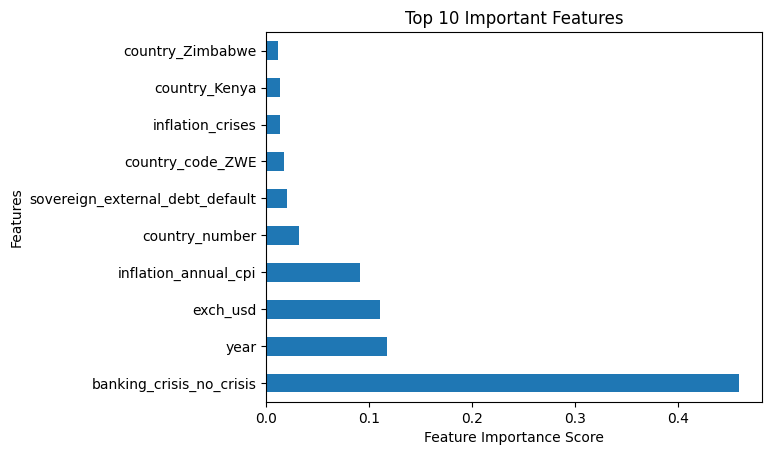

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.show()
